In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.decomposition import PCA

In [7]:
def tokenize_corpus(corpus):
    tokens = corpus.lower().replace(".", "").replace(",", "").split()
    return tokens

In [8]:
def get_distinct_words(tokens):
    return list(set(tokens))

In [9]:
def build_cooccurrence_matrix(tokens, window_size=4):
    vocab = get_distinct_words(tokens)
    vocab_size = len(vocab)
    word_to_id = {word: i for i, word in enumerate(vocab)}
    id_to_word = {i: word for i, word in enumerate(vocab)}

    matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word in enumerate(tokens):
        word_id = word_to_id[word]
        start = max(0, idx - window_size)
        end = min(len(tokens), idx + window_size + 1)

        for i in range(start, end):
            if i != idx:  # skip center word
                context_word = tokens[i]
                context_id = word_to_id[context_word]
                matrix[word_id][context_id] += 1

    return matrix, word_to_id, id_to_word

In [10]:
def reduce_dimensions(matrix, k=2):
    pca = PCA(n_components=k)
    reduced = pca.fit_transform(matrix)
    return reduced

In [11]:
def plot_embeddings(embeddings, id_to_word, save_as="embeddings.png"):
    plt.figure(figsize=(12, 8))
    for idx, word in id_to_word.items():
        x, y = embeddings[idx, 0], embeddings[idx, 1]
        plt.scatter(x, y, marker='o', color="blue")
        plt.text(x + 0.01, y + 0.01, word, fontsize=9)
    plt.title("2D Word Embeddings (Co-occurrence + PCA)")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True)
    plt.savefig(save_as, dpi=300)
    plt.show()

Tokens: ['the', 'us', 'government', 'announced', 'new', 'policies', 'today', 'to', 'boost', 'the', 'economy', 'stock', 'markets', 'reacted', 'positively', 'to', 'the', 'news', 'with', 'gains', 'in', 'technology', 'and', 'banking', 'sectors', 'experts', 'believe', 'the', 'reforms', 'will'] ...

Distinct words: ['inflation', 'experts', 'positively', 'us', 'economy', 'technology', 'reforms', 'create', 'to', 'mixed', 'and', 'stock', 'more', 'trade', 'financial', 'markets', 'in', 'the', 'jobs', 'government', 'announced', 'today', 'quarterly', 'new', 'news', 'with', 'global', 'concerns', 'policies', 'sectors', 'gains', 'system', 'companies', 'meanwhile', 'strengthen', 'boost', 'higher', 'believe', 'due', 'reported', 'will', 'reacted', 'banking', 'uncertainty', 'signals', 'profits', 'despite', 'international', 'showed']

Co-occurrence matrix shape: (49, 49)

Reduced Embeddings (first 5 rows):
 [[-0.56320475  0.0908282 ]
 [ 0.16842282  0.44628049]
 [ 0.57321749  0.61485428]
 [ 0.26718642  0.64

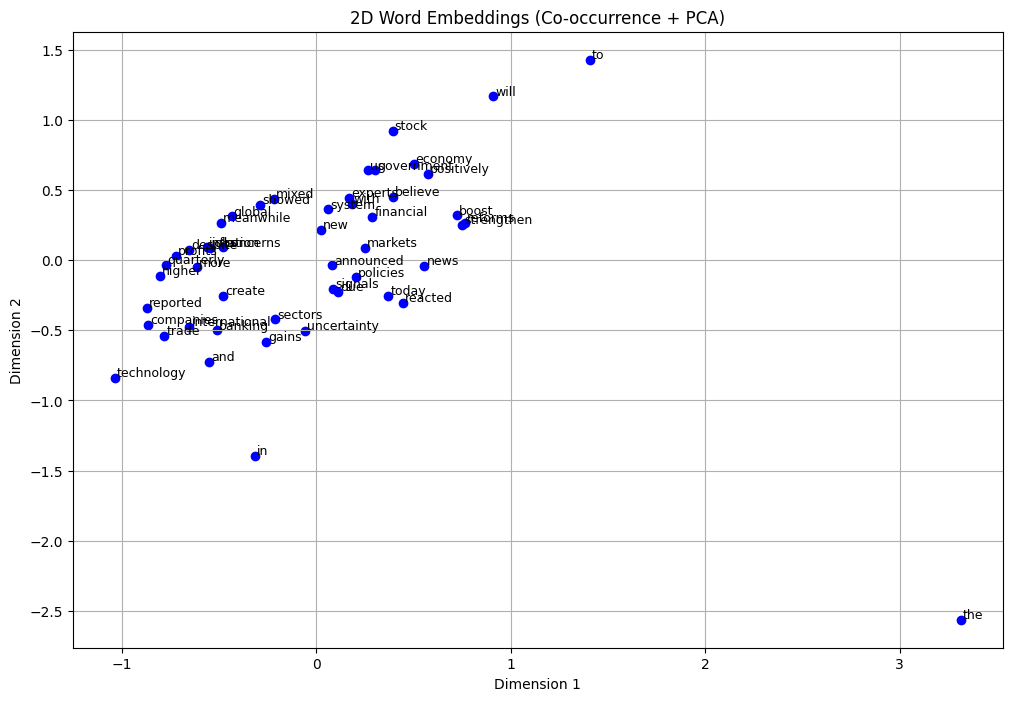

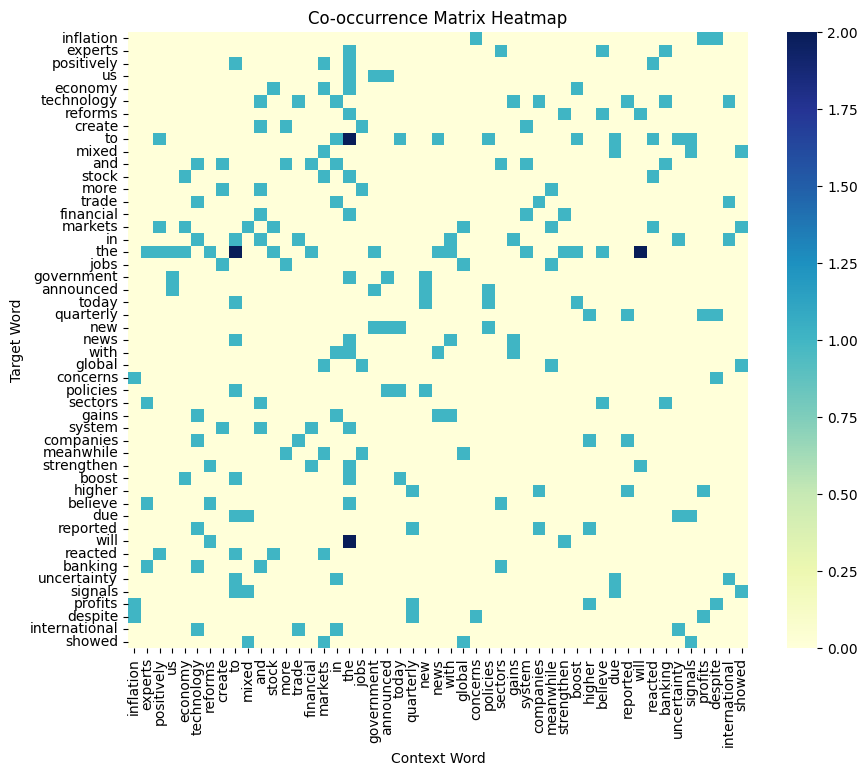

In [12]:
if __name__ == "__main__":
    # Small News-like Dataset (toy corpus)
    corpus = """
    The US government announced new policies today to boost the economy.
    Stock markets reacted positively to the news with gains in technology and banking sectors.
    Experts believe the reforms will strengthen the financial system and create more jobs.
    Meanwhile, global markets showed mixed signals due to uncertainty in international trade.
    Technology companies reported higher quarterly profits despite inflation concerns.
    """

    tokens = tokenize_corpus(corpus)
    print("Tokens:", tokens[:30], "...")  # preview first 30 tokens

    vocab = get_distinct_words(tokens)
    print("\nDistinct words:", vocab)

    co_matrix, word_to_id, id_to_word = build_cooccurrence_matrix(tokens, window_size=2)
    print("\nCo-occurrence matrix shape:", co_matrix.shape)

    embeddings = reduce_dimensions(co_matrix, k=2)
    print("\nReduced Embeddings (first 5 rows):\n", embeddings[:5])

    plot_embeddings(embeddings, id_to_word)
    plt.figure(figsize=(10, 8))
    sns.heatmap(co_matrix, cmap="YlGnBu", xticklabels=vocab, yticklabels=vocab)
    plt.title("Co-occurrence Matrix Heatmap")
    plt.xlabel("Context Word")
    plt.ylabel("Target Word")
    plt.show()